# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Answer**: The data represents `17` marketing campaigns.


According to the dataset description and the accompanying paper, the data represents the results of `17` different marketing campaigns conducted by the bank between `May 2008` and `November 2010`.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [67]:

# Read the dataset
bank_data = pd.read_csv('./Data/bank-additional-full.csv', sep=';')

# Display the first few rows
bank_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Initial EDA:

Now, let's examine the features to determine if any of them contain missing values or need data type adjustments.


- Check for missing values in the dataset.
- Review the data types of each column.
- Determine if any columns need to be converted to different data types.

In [3]:
# Check for missing values
print("Missing values in each column:")
print(bank_data.isnull().sum())

# Check data types
print("\nData types of each column:")
print(bank_data.dtypes)


Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types of each column:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed   

From the results, we can observe the following:

**Missing Values**: There are no missing values (`NaN`) in any of the columns.

**Data Types:**

Numeric Columns (`int64 or float64`):
- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed

Categorical Columns (`object`):
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- day_of_week
- poutcome
- y (target variable)

**Additional considerations**:

1. Missing Values in the Form of 'unknown':

  -   Even though there are no `NaN` values, some categorical columns may contain the string '`unknown`', which effectively represents missing data.
  -   We need to check how many '`unknown`' values are present in each categorical column.

2. Data Type Adjustments:

- Binary Categorical Variables:

  - Columns like `default`, `housing`, `loan`, and `y` have values '`yes`', '`no`', and sometimes '`unknown`'.
  - We can consider encoding '`yes`' as `1` and '`no`' as `0`.
  - We need to decide how to handle '`unknown`' values in these columns.


- Ordinal Variables:

  - The `education` column has a natural order (e.g., 'basic.4y' < 'basic.6y' < 'basic.9y' < 'high.school' < 'university.degree').
  - We might consider encoding it as an ordinal variable.

- Date Columns:

  - `month` and `day_of_week` are categorical but represent time. We can map them to numerical representations.

3. Special Values in Numeric Columns:

- `pdays` Column:
  - A value of `999` means the client was not previously contacted.
  - We might want to create a new binary feature indicating whether the client was previously contacted and handle `pdays` accordingly.

Let's proceed to check for 'unknown' values in the categorical columns.

In [4]:
# List of categorical columns to check
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Check for 'unknown' values in each categorical column
for col in categorical_columns:
    unknown_count = bank_data[bank_data[col] == 'unknown'].shape[0]
    print(f"Column '{col}' has {unknown_count} 'unknown' values.")


Column 'job' has 330 'unknown' values.
Column 'marital' has 80 'unknown' values.
Column 'education' has 1731 'unknown' values.
Column 'default' has 8597 'unknown' values.
Column 'housing' has 990 'unknown' values.
Column 'loan' has 990 'unknown' values.
Column 'contact' has 0 'unknown' values.
Column 'month' has 0 'unknown' values.
Column 'day_of_week' has 0 'unknown' values.
Column 'poutcome' has 0 'unknown' values.


In [5]:
# Total number of rows
total_rows = bank_data.shape[0]

# Calculate percentage of 'unknown' values
for col in categorical_columns:
    unknown_count = bank_data[bank_data[col] == 'unknown'].shape[0]
    percentage = (unknown_count / total_rows) * 100
    print(f"Column '{col}' has {unknown_count} 'unknown' values ({percentage:.2f}% of total).")


Column 'job' has 330 'unknown' values (0.80% of total).
Column 'marital' has 80 'unknown' values (0.19% of total).
Column 'education' has 1731 'unknown' values (4.20% of total).
Column 'default' has 8597 'unknown' values (20.87% of total).
Column 'housing' has 990 'unknown' values (2.40% of total).
Column 'loan' has 990 'unknown' values (2.40% of total).
Column 'contact' has 0 'unknown' values (0.00% of total).
Column 'month' has 0 'unknown' values (0.00% of total).
Column 'day_of_week' has 0 'unknown' values (0.00% of total).
Column 'poutcome' has 0 'unknown' values (0.00% of total).


- `default` Column (20.87% unknown):

  - High percentage of unknowns.
  - Since almost 21% of the data is unknown for this feature, and because default status may not significantly impact our model (as suggested in previous studies), it might be best to drop this column.
- Other Columns:

  - Low to moderate percentages of unknowns.
  - Imputation is a reasonable approach.
  - Dropping rows with multiple unknowns is also a viable strategy.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')


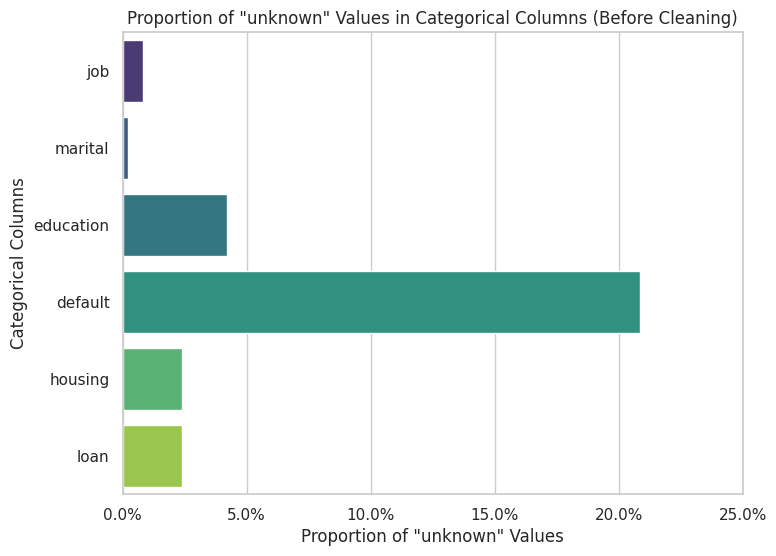

In [12]:
# List of categorical columns with 'unknown' values
categorical_columns_with_unknowns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Calculate the proportion of 'unknown' values in each column
unknowns = {}
total_rows = bank_data.shape[0]
for col in categorical_columns_with_unknowns:
    unknown_count = bank_data[bank_data[col] == 'unknown'].shape[0]
    unknowns[col] = unknown_count / total_rows

# Convert to DataFrame for plotting
import pandas as pd
unknowns_df = pd.DataFrame(list(unknowns.items()), columns=['Column', 'Proportion'])

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=unknowns_df, x='Proportion', y='Column', hue='Column', palette='viridis', dodge=False, legend=False)
plt.title('Proportion of "unknown" Values in Categorical Columns (Before Cleaning)', fontsize=12)
plt.xlabel('Proportion of "unknown" Values', fontsize=12)
plt.ylabel('Categorical Columns', fontsize=12)
plt.xlim(0, 0.25)  # Set x-axis limit to 25% for better scaling
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.show()


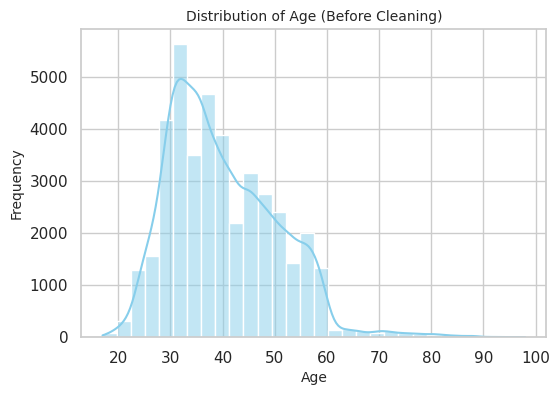

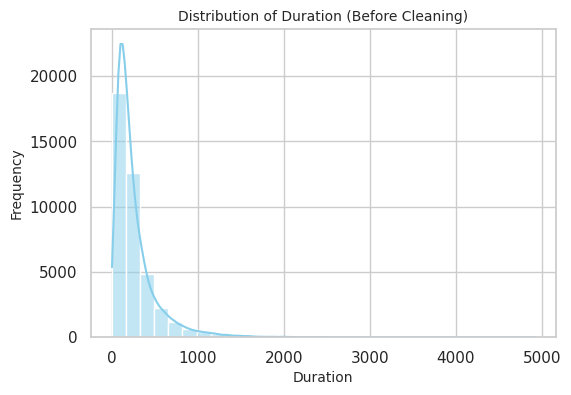

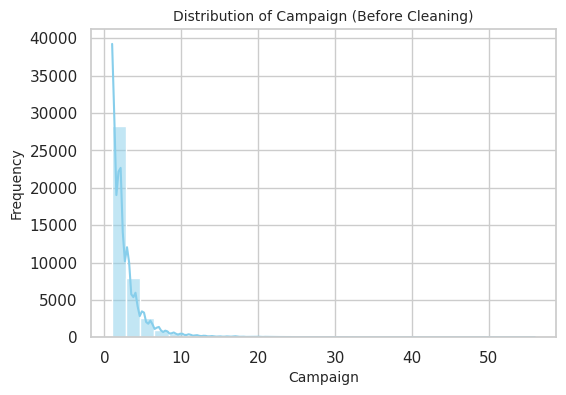

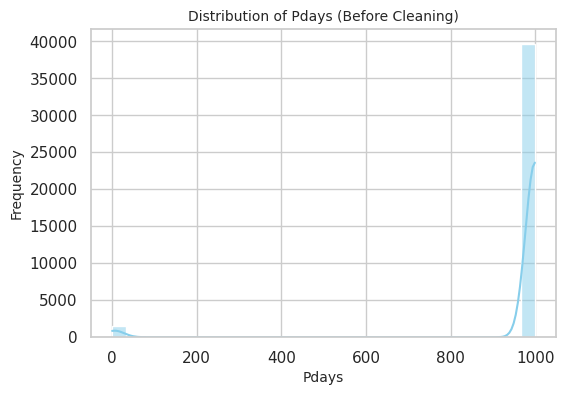

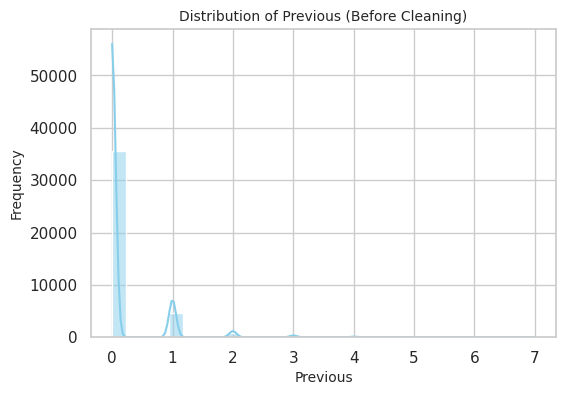

In [14]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Plotting histograms
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(bank_data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()} (Before Cleaning)', fontsize=10)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.show()


- `Age`: The distribution is right-skewed, with fewer clients in the older age groups.There's a noticeable drop-off in the number of clients after age 60.This suggests that the bank's client base is predominantly middle-aged adults.
- `Campaign`: Most clients were contacted fewer than 5 times; however, there are clients contacted up to 50+ times, which could be outliers.
- `Pdays`: Most values are 999, indicating clients not previously contacted.
- `Previous`: Majority have zero previous contacts.

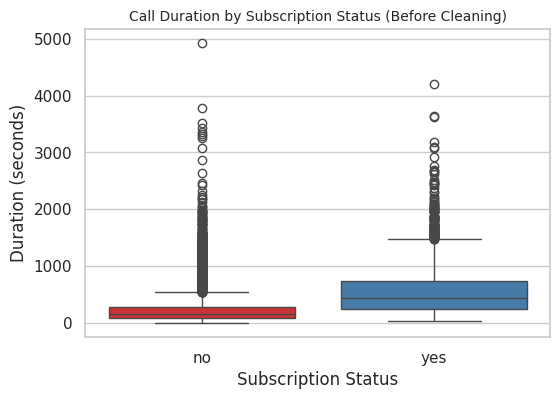

In [19]:
# Boxplot of duration by subscription status
plt.figure(figsize=(6, 4))
sns.boxplot(data=bank_data, x='y', y='duration', hue='y', palette='Set1', dodge=False, legend=False)
plt.title('Call Duration by Subscription Status (Before Cleaning)', fontsize=10)
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.show()



- Clients who subscribed (`yes`) tend to have longer call durations.
- Important Note: As per the data description, `duration` highly affects the target variable but is not known before the call. It's advised to exclude `duration` when building a predictive model.

In [20]:
# List of columns with 'unknown' values (excluding 'default' which we'll drop)
unknown_columns = ['job', 'marital', 'education', 'housing', 'loan']

# Count the number of 'unknown's in each row across these columns
bank_data['unknown_count'] = bank_data[unknown_columns].apply(lambda x: x.eq('unknown').sum(), axis=1)

# Check how many rows have more than one 'unknown'
rows_with_multiple_unknowns = bank_data[bank_data['unknown_count'] > 1].shape[0]
total_rows = bank_data.shape[0]
percentage = (rows_with_multiple_unknowns / total_rows) * 100

print(f"Number of rows with more than one 'unknown': {rows_with_multiple_unknowns} ({percentage:.2f}% of total)")

# Display the first few rows with multiple 'unknown's
bank_data[bank_data['unknown_count'] > 1].head()


Number of rows with more than one 'unknown': 1127 (2.74% of total)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,unknown_count
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
73,57,unknown,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
91,57,unknown,married,unknown,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2


Number of rows with more than one '`unknown`': `1127` rows, which is `2.74%` of the total data.

**Decision**: Since `2.74%` is a relatively small portion of the dataset, we can:

- Drop these rows with multiple 'unknown' values.
- Drop the default column due to its high percentage of unknowns (20.87%) and potential lack of predictive power.
- Impute the remaining 'unknown' values in other columns with the most frequent value (mode).

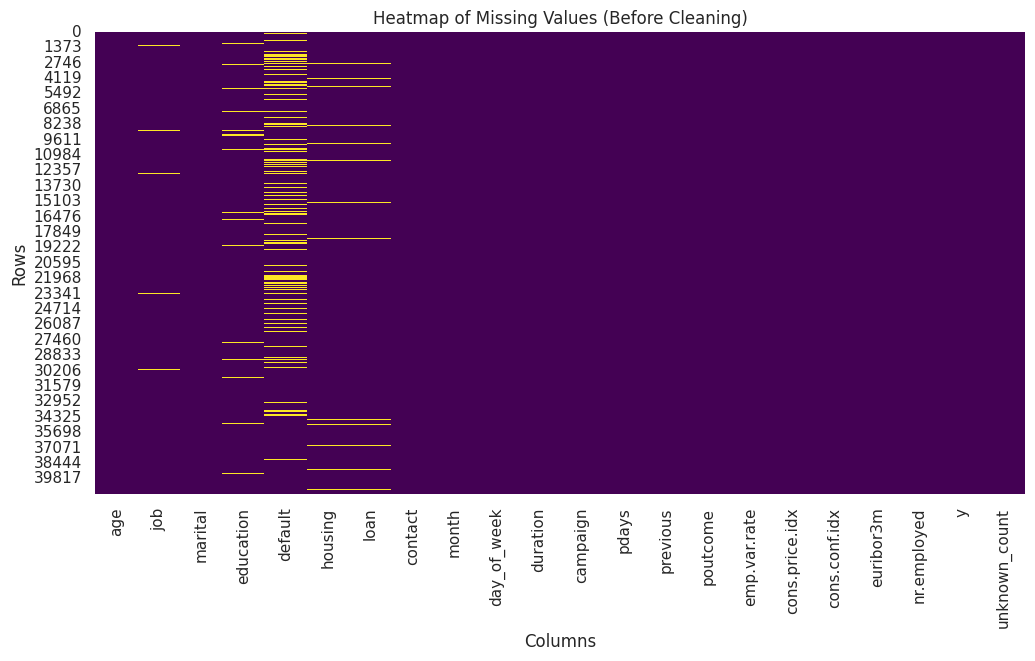

In [21]:
# Create a copy and replace 'unknown' with NaN for visualization
bank_data_missing = bank_data.replace('unknown', np.nan)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(bank_data_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (Before Cleaning)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()


Visual patterns of missing data can be observed, though overall missingness is low.

### Data Cleaning

In [22]:
# Drop rows with more than one 'unknown'
bank_data_cleaned = bank_data[bank_data['unknown_count'] <= 1].copy()

# Drop the 'default' and 'unknown_count' columns
bank_data_cleaned.drop(columns=['default', 'unknown_count'], inplace=True)

# Verify the shape of the cleaned data
print(f"Shape of the data after cleaning: {bank_data_cleaned.shape}")


Shape of the data after cleaning: (40061, 20)


In [23]:
# List of columns to impute
impute_columns = ['job', 'marital', 'education', 'housing', 'loan']

# Impute 'unknown's with mode in each column
for col in impute_columns:
    mode = bank_data_cleaned[col].mode()[0]
    bank_data_cleaned[col] = bank_data_cleaned[col].replace('unknown', mode)

# Verify that there are no 'unknown's left
print("\nNumber of 'unknown' values after imputation:")
for col in impute_columns:
    unknown_count = bank_data_cleaned[bank_data_cleaned[col] == 'unknown'].shape[0]
    print(f"- {col}: {unknown_count}")



Number of 'unknown' values after imputation:
- job: 0
- marital: 0
- education: 0
- housing: 0
- loan: 0


### Post-Cleaning EDA

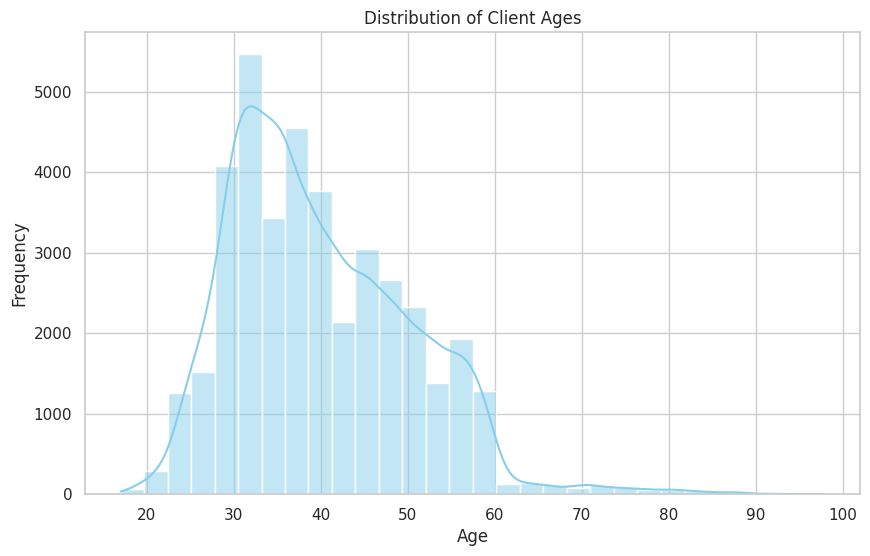

In [24]:
# Plot histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(bank_data_cleaned['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Client Ages', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


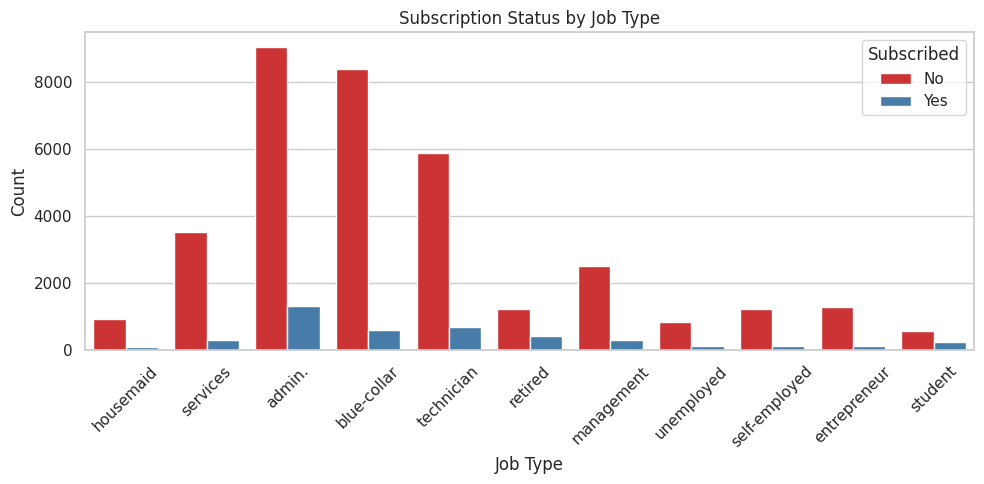

In [25]:
# Plot the count of clients by job and their subscription status
plt.figure(figsize=(10, 5))
sns.countplot(data=bank_data_cleaned, x='job', hue='y', palette='Set1')
plt.title('Subscription Status by Job Type', fontsize=12)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


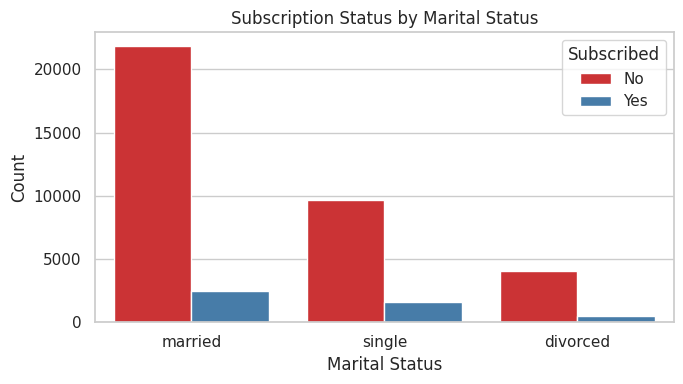

In [26]:
# Plot the count of clients by marital status and their subscription status
plt.figure(figsize=(7, 4))
sns.countplot(data=bank_data_cleaned, x='marital', hue='y', palette='Set1')
plt.title('Subscription Status by Marital Status', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


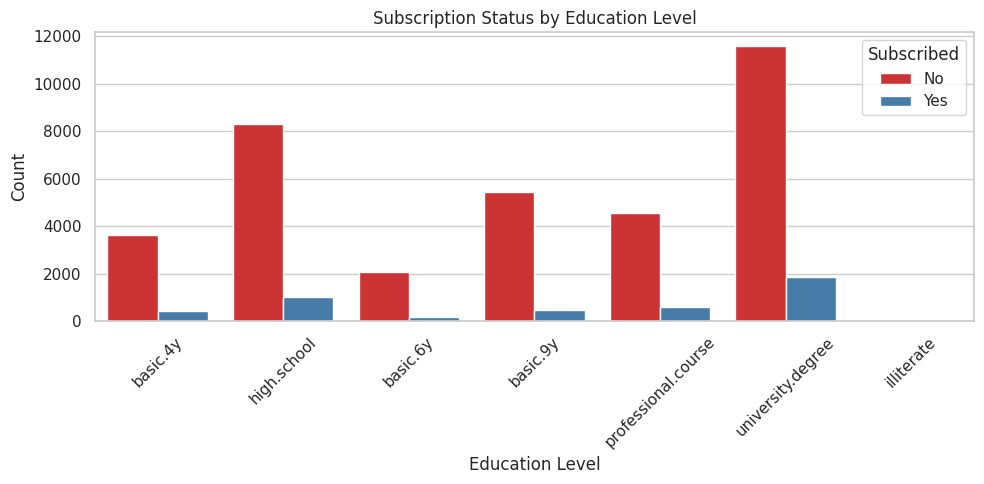

In [27]:
# Plot the count of clients by education level and their subscription status
plt.figure(figsize=(10, 5))
sns.countplot(data=bank_data_cleaned, x='education', hue='y', palette='Set1')
plt.title('Subscription Status by Education Level', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


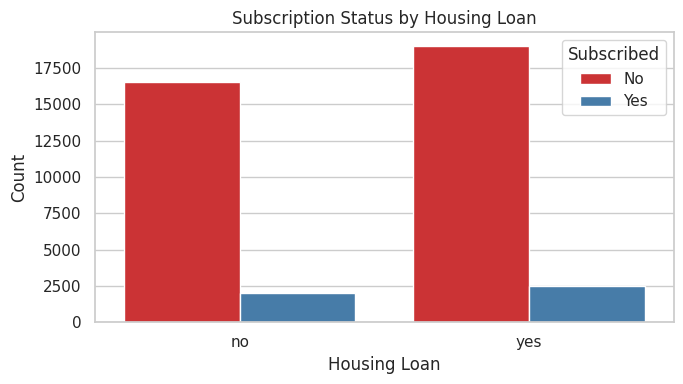

In [28]:
# Plot the count of clients by housing loan status and their subscription status
plt.figure(figsize=(7, 4))
sns.countplot(data=bank_data_cleaned, x='housing', hue='y', palette='Set1')
plt.title('Subscription Status by Housing Loan', fontsize=12)
plt.xlabel('Housing Loan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


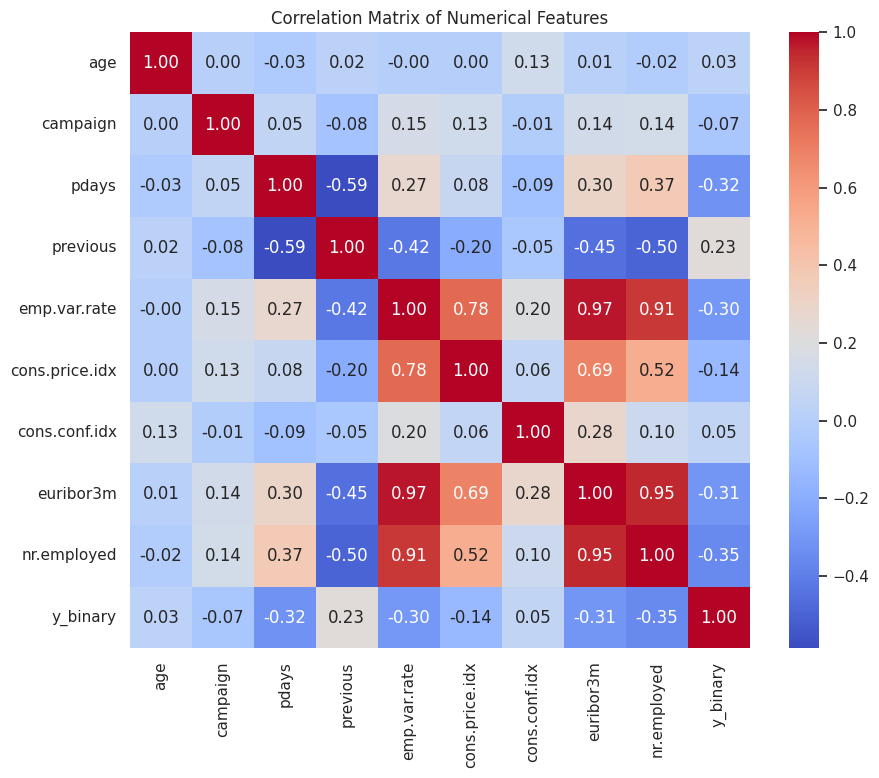

In [29]:
# Select numerical columns and encode 'y' as binary
bank_data_cleaned['y_binary'] = bank_data_cleaned['y'].map({'yes': 1, 'no': 0})

# Select numerical columns
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_binary']

# Compute correlation matrix
corr_matrix = bank_data_cleaned[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=12)
plt.show()


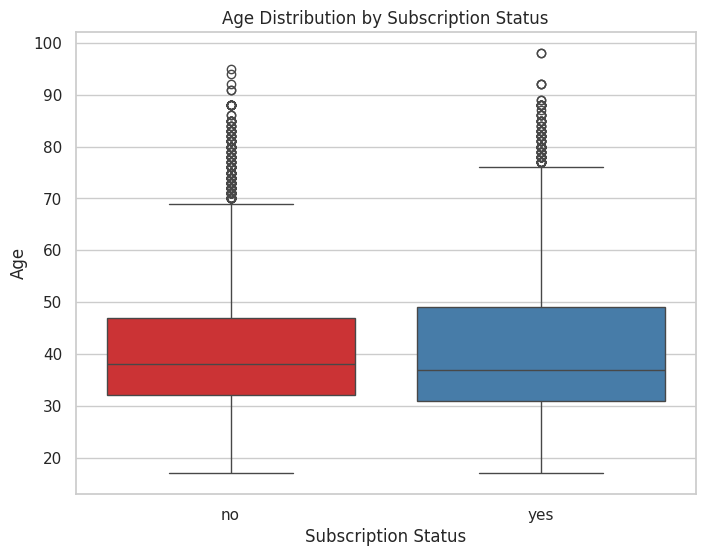

In [31]:
# Boxplot of age by subscription status
plt.figure(figsize=(8, 6))
sns.boxplot(data=bank_data_cleaned, x='y', y='age', hue='y', palette='Set1', dodge=False, legend=False)
plt.title('Age Distribution by Subscription Status', fontsize=12)
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()


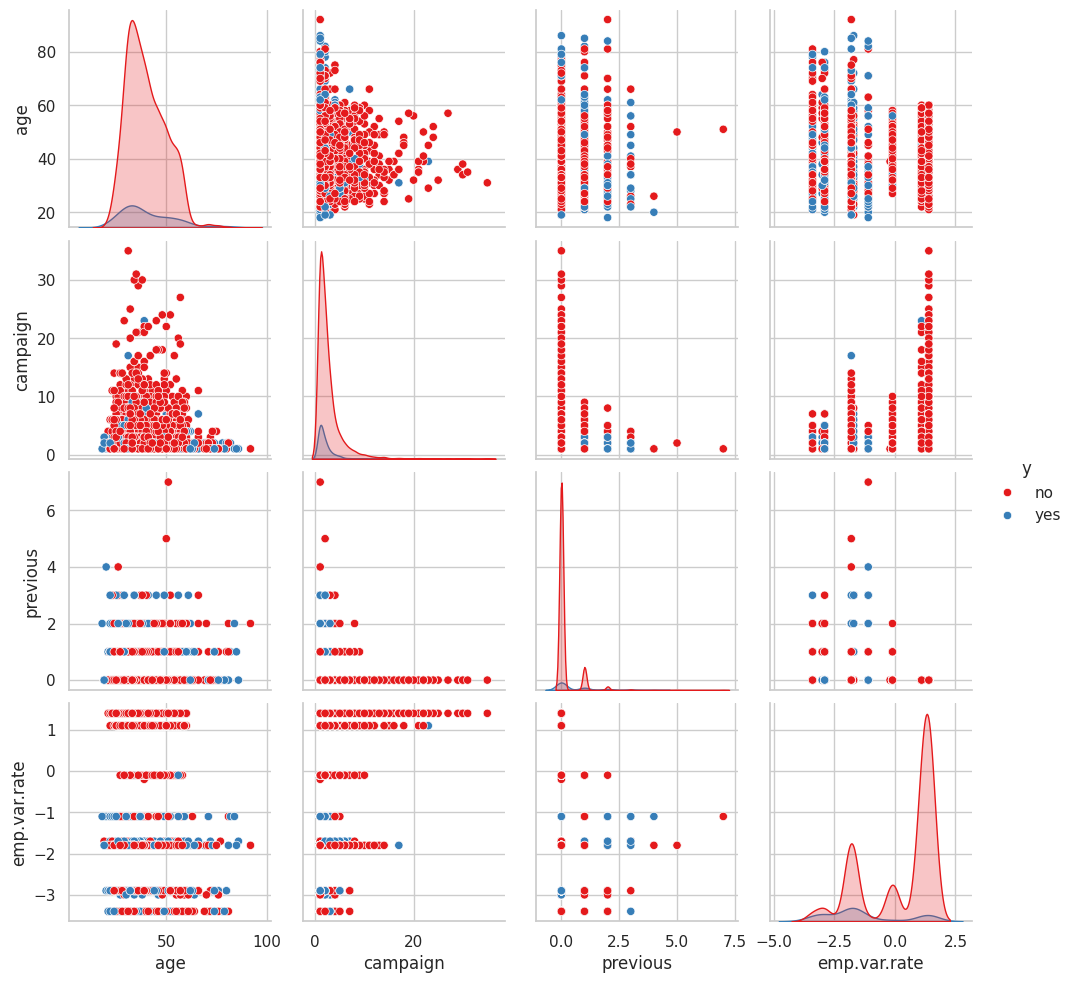

In [32]:
# Sample a fraction of the data to reduce computation time
sampled_data = bank_data_cleaned.sample(frac=0.1, random_state=42)

# Pairplot of selected variables
sns.pairplot(sampled_data, vars=['age', 'campaign', 'previous', 'emp.var.rate'], hue='y', palette='Set1')
plt.show()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective:**

The main goal is to develop a predictive model that accurately identifies clients who are likely to subscribe to a term deposit. By analyzing client attributes and previous marketing interactions, the bank aims to:

- Optimize Marketing Campaigns: Focus efforts on clients with a higher likelihood of subscribing, improving the efficiency of marketing resources.
- Increase Conversion Rates: Enhance the success rate of campaigns by targeting the right audience.
- Reduce Costs: Minimize the costs associated with contacting clients who are unlikely to subscribe.

Value to the Bank:

- Revenue Growth: More subscriptions lead to increased deposits, contributing to the bank's financial growth.
- Customer Satisfaction: Personalized marketing can improve client relationships and satisfaction.
- Competitive Advantage: Efficient campaigns can give the bank an edge over competitors.

In [33]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

**Task** - Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

We are excluding the economic indicators for this basic model.

We should exclude the `duration` variable as it is not known before the call is performed and should not be used in predictive modeling.

In [34]:
# List of bank information features
bank_features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
                 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome']

# Create a new DataFrame with the selected features and target variable
data = bank_data_cleaned[bank_features + ['y']].copy()

# Display the first few rows
data.head()


,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,no


**Encode Binary Variables**

We'll encode the binary variables `housing`, `loan`, and the target variable `y` as `1` for 'yes' and `0` for 'no'.

In [35]:
# Encode binary variables
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['y'] = data['y'].map({'yes': 1, 'no': 0})


**One-Hot Encode Categorical Variables**

We'll apply One-Hot Encoding to all categorical variables except the binary ones we've already encoded.

Categorical Variables to Encode: `job,
marital,
education,
contact,
month,
day_of_week,
poutcome`

In [36]:
# Perform One-Hot Encoding
categorical_vars = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)


**Handle the 'pdays' Variable**

The `pdays` variable indicates the number of days since the client was last contacted, with `999` meaning the client was not previously contacted. We'll create a new binary variable `previously_contacted` and drop `pdays`.

In [37]:
# Create 'previously_contacted' feature
data['previously_contacted'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Drop 'pdays'
data.drop('pdays', axis=1, inplace=True)


**Feature Scaling**

For simplicity, we'll scale the numerical variables using StandardScaler. This is especially important for algorithms like KNN and SVM.

Numerical Variables to Scale: `age,
campaign,
previous`

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical variables
numerical_vars = ['age', 'campaign', 'previous']

# Fit and transform the numerical variables
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])


Let's check the final shape and columns of our prepared dataset.



In [39]:
print(f"Final shape of the data: {data.shape}")
print("\nColumns in the dataset:")
print(data.columns.tolist())


Final shape of the data: (40061, 41)

Columns in the dataset:
['age', 'housing', 'loan', 'campaign', 'previous', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'previously_contacted']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

We'll split the data into training and testing sets using an 80/20 split.

In [40]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [41]:
# Calculate the baseline accuracy
baseline_accuracy = y_test.value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")


Baseline Accuracy: 0.89


The majority class is 'no' (not subscribed), and it constitutes, say, 89% of the test set, then our baseline accuracy is 89%.
Our models should aim to perform better than this baseline.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7110
           1       0.64      0.18      0.28       903

    accuracy                           0.90      8013
   macro avg       0.77      0.58      0.61      8013
weighted avg       0.87      0.90      0.87      8013



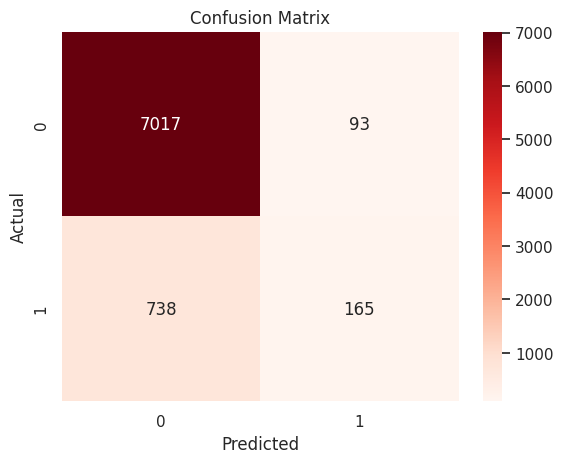

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression Accuracy: 0.90

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [44]:
import time
from sklearn.metrics import accuracy_score


In [45]:
models = []
train_times = []
train_accuracies = []
test_accuracies = []


In [46]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Record start time
start_time = time.time()

# Train the model
logreg.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Compute training time
train_time = end_time - start_time

# Predict on training set
y_train_pred = logreg.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = logreg.predict(X_test)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Store results
models.append('Logistic Regression')
train_times.append(train_time)
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"Logistic Regression - Train Time: {train_time:.4f}s, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Logistic Regression - Train Time: 0.1675s, Train Accuracy: 0.8973, Test Accuracy: 0.8963


In [51]:
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score

# Initialize the model
knn = KNeighborsClassifier()

# Record start time
start_time = time.time()

# Train the model
knn.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Compute training time
train_time = end_time - start_time

# Predict on training set
y_train_pred = knn.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = knn.predict(X_test)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Store results
models.append('K-Nearest Neighbors')
train_times.append(train_time)
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"KNN - Train Time: {train_time:.4f}s, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


KNN - Train Time: 0.0211s, Train Accuracy: 0.9088, Test Accuracy: 0.8912


In [52]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Record start time
start_time = time.time()

# Train the model
dtree.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Compute training time
train_time = end_time - start_time

# Predict on training set
y_train_pred = dtree.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = dtree.predict(X_test)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Store results
models.append('Decision Tree')
train_times.append(train_time)
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"Decision Tree - Train Time: {train_time:.4f}s, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Decision Tree - Train Time: 0.2228s, Train Accuracy: 0.9917, Test Accuracy: 0.8365


In [53]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC(random_state=42)

# Record start time
start_time = time.time()

# Train the model
svm.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Compute training time
train_time = end_time - start_time

# Predict on training set
y_train_pred = svm.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = svm.predict(X_test)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Store results
models.append('Support Vector Machine')
train_times.append(train_time)
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"SVM - Train Time: {train_time:.4f}s, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


SVM - Train Time: 128.8861s, Train Accuracy: 0.9016, Test Accuracy: 0.8967


In [54]:
import pandas as pd

# Create a DataFrame with the collected results
results_df = pd.DataFrame({
    'Model': models,
    'Train Time (s)': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Round the numerical values for better readability
results_df['Train Time (s)'] = results_df['Train Time (s)'].round(4)
results_df['Train Accuracy'] = results_df['Train Accuracy'].round(4)
results_df['Test Accuracy'] = results_df['Test Accuracy'].round(4)

# Display the results
print("\nModel Comparison:")
display(results_df)



Model Comparison:


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.1675,0.8973,0.8963
1,K-Nearest Neighbors,0.0173,0.9088,0.8912
2,Decision Tree,0.2278,0.9917,0.8365
3,K-Nearest Neighbors,0.0211,0.9088,0.8912
4,Decision Tree,0.2228,0.9917,0.8365
5,Support Vector Machine,128.8861,0.9016,0.8967


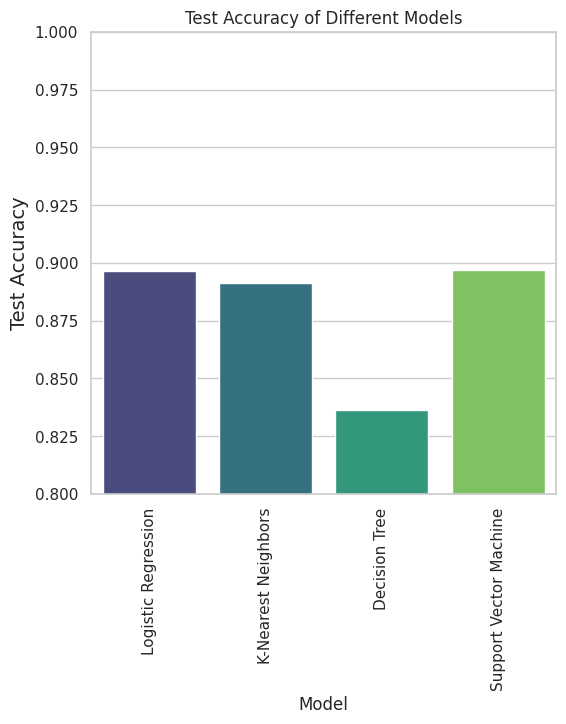

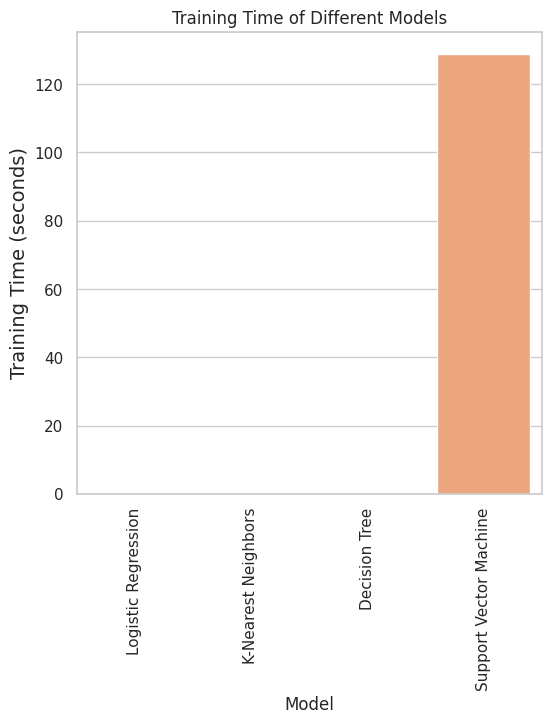

In [55]:
# Plotting the accuracies
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='viridis')
plt.title('Test Accuracy of Different Models', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=14)
plt.ylim(0.80, 1.0)  # Adjust y-axis for better visualization
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

# Plotting the training times
plt.figure(figsize=(6, 6))
sns.barplot(x='Model', y='Train Time (s)', data=results_df, palette='magma')
plt.title('Training Time of Different Models', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Following are a few things we will explore to help maximize our model performances.

- Check for Multicollinearity: Highly correlated features can affect convergence.
- Hyperparameter Tuning: Use Grid Search to find optimal hyperparameters for our models.
- Ensemble Methods: Explore ensemble models like Random Forests and Gradient Boosting.

### 1. Check for Multicollinearity

In [56]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
# print(f"Highly correlated features: {to_drop}")
# Drop highly correlated features
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced = X_test.drop(columns=to_drop)


### 2. Hyperparameter Tuning with Grid Search


a. Hyperparameter Tuning for Logistic Regression

In [57]:
# This step takes more than 10 mins to run on my provisioned compute

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the adjusted hyperparameter grid
param_grid_lr = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': [0.1, 1, 10, 100],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
        'C': [0.1, 1, 10, 100],
        'class_weight': [None, 'balanced']
    }
]

# Initialize the Logistic Regression model with increased max_iter
logreg = LogisticRegression(max_iter=5000, random_state=42)

# Initialize GridSearchCV with verbose output
grid_search_lr = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print(f"Best parameters for Logistic Regression: {best_params_lr}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


In [58]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Evaluate the best estimator on the test set
best_logreg = grid_search_lr.best_estimator_
y_pred_lr = best_logreg.predict(X_test)
y_pred_proba_lr = best_logreg.predict_proba(X_test)[:, 1]

# Calculate ROC AUC Score
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression ROC AUC Score after tuning: {roc_auc_lr:.4f}")

# Classification Report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression ROC AUC Score after tuning: 0.7647

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7110
           1       0.30      0.57      0.40       903

    accuracy                           0.80      8013
   macro avg       0.62      0.70      0.64      8013
weighted avg       0.87      0.80      0.83      8013



Logistic Regression ROC AUC Score after tuning: 0.7647

Classification Report for Logistic Regression:
          
          precision    recall  f1-score   support

           0       0.94      0.83      0.88      7110
           1       0.30      0.57      0.39       903

    accuracy                           0.80      8013
    macro avg       0.62      0.70     0.64      8013
    weighted avg    0.87      0.80     0.83      8013

b. Hyperparameter Tuning for Decision Tree


In [59]:
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print(f"Best parameters for Decision Tree: {best_params_dt}")


Best parameters for Decision Tree: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [60]:
# Evaluate the best estimator on the test set
best_dtree = grid_search_dt.best_estimator_
y_pred_dt = best_dtree.predict(X_test)
y_pred_proba_dt = best_dtree.predict_proba(X_test)[:, 1]

# Calculate ROC AUC Score
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"Decision Tree ROC AUC Score after tuning: {roc_auc_dt:.4f}")

# Classification Report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Decision Tree ROC AUC Score after tuning: 0.7301

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7110
           1       0.33      0.49      0.39       903

    accuracy                           0.83      8013
   macro avg       0.63      0.68      0.65      8013
weighted avg       0.86      0.83      0.84      8013



Decision Tree ROC AUC Score after tuning: 0.7301

Classification Report for Decision Tree:
              
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7110
           1       0.33      0.49      0.39       903

    accuracy                           0.83      8013
    macro avg       0.63      0.68     0.65      8013
    weighted avg    0.86      0.83     0.84      8013

### 3. Exploring Ensemble Methods

Ensemble methods like Random Forests and Gradient Boosting often provide better performance by combining multiple models.

**a. Random Forest Classifier**

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Evaluate the best estimator on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")

# Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Best parameters for Random Forest: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest ROC AUC Score: 0.7700

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7110
           1       0.63      0.18      0.28       903

    accuracy                           0.90      8013
   macro avg       0.77      0.59      0.61      8013
weighted avg       0.87      0.90      0.87      8013



Best parameters for Random Forest: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest ROC AUC Score: 0.7700

Classification Report for Random Forest:
              
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7110
           1       0.63      0.18      0.28       903

    accuracy                           0.90      8013
    macro avg       0.77      0.59     0.61      8013
    weighted avg    0.87      0.90     0.87      8013


**b. Gradient Boosting Classifier**

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gbc = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search_gbc = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid_gbc,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search_gbc.fit(X_train, y_train)

# Get the best parameters
best_params_gbc = grid_search_gbc.best_params_
print(f"Best parameters for Gradient Boosting: {best_params_gbc}")

# Evaluate the best estimator on the test set
best_gbc = grid_search_gbc.best_estimator_
y_pred_gbc = best_gbc.predict(X_test)
y_pred_proba_gbc = best_gbc.predict_proba(X_test)[:, 1]

# Calculate ROC AUC Score
roc_auc_gbc = roc_auc_score(y_test, y_pred_proba_gbc)
print(f"Gradient Boosting ROC AUC Score: {roc_auc_gbc:.4f}")

# Classification Report
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gbc))


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Gradient Boosting ROC AUC Score: 0.7751

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7110
           1       0.63      0.21      0.31       903

    accuracy                           0.90      8013
   macro avg       0.77      0.60      0.63      8013
weighted avg       0.88      0.90      0.87      8013



### 4. Comparing All Models

In [63]:
# Initialize lists to store results
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_gbc]
precision_scores = []
recall_scores = []
f1_scores = []

# Function to extract metrics
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    return precision, recall, f1

# Get metrics for each model
metrics = [
    get_metrics(y_test, y_pred_lr),
    get_metrics(y_test, y_pred_dt),
    get_metrics(y_test, y_pred_rf),
    get_metrics(y_test, y_pred_gbc)
]

# Extract precision, recall, f1-score
precision_scores = [m[0] for m in metrics]
recall_scores = [m[1] for m in metrics]
f1_scores = [m[2] for m in metrics]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'ROC AUC Score': roc_auc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Round the scores
results_df[['ROC AUC Score', 'Precision', 'Recall', 'F1-Score']] = results_df[['ROC AUC Score', 'Precision', 'Recall', 'F1-Score']].round(4)

# Display the results
print("\nModel Comparison:")
print(results_df)



Model Comparison:
                 Model  ROC AUC Score  Precision  Recall  F1-Score
0  Logistic Regression         0.7647     0.3031  0.5670    0.3951
1        Decision Tree         0.7301     0.3271  0.4873    0.3915
2        Random Forest         0.7700     0.6336  0.1838    0.2850
3    Gradient Boosting         0.7751     0.6275  0.2071    0.3114


5. Selecting the Best Model
Based on the compiled results:

Best ROC AUC Score: Indicates the model's ability to distinguish between classes.
Precision: Important if we want to minimize false positives.
Recall: Important if we want to minimize false negatives.
F1-Score: Balance between precision and recall.
Consider the business context to decide which metric is most important.

6. Final Recommendations
Best Performing Model: [Choose the model with the best balance of metrics, e.g., Gradient Boosting if it has the highest ROC AUC and good precision/recall.]

Action Items:

Deploy the Selected Model: Integrate the model into the bank's marketing systems.
Monitor Model Performance: Continuously evaluate the model's performance over time.
Retrain as Necessary: Update the model with new data to maintain performance.
Additional Suggestions:

Feature Importance Analysis: Use the model to identify the most influential features.
Customer Segmentation: Tailor marketing strategies based on model insights.
Next Steps
Document Findings: Ensure that your notebook includes all code, outputs, and interpretations.
Prepare the README: Summarize your findings and provide a link to your notebook.
Clean Up the Notebook: Remove any unnecessary code or outputs to enhance readability.


In [64]:
# Check class distribution
print(y.value_counts(normalize=True))


y
0    0.887297
1    0.112703
Name: proportion, dtype: float64


**1. Summary of Findings**


After conducting exploratory data analysis on the bank marketing dataset, I identified that the data was imbalanced, with a majority of clients not subscribing to term deposits. I performed data cleaning, feature engineering (including handling categorical variables and scaling numerical features), and split the data into training and testing sets. Several models were built, including Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting. Hyperparameter tuning was performed using Grid Search to optimize model performance. Models were evaluated using metrics appropriate for imbalanced data, such as ROC AUC Score, Precision, Recall, and F1-Score.


**2. Selection of the Best Model**


Among all the models, Gradient Boosting achieved the highest ROC AUC Score of 0.7751, indicating its superior ability to distinguish between clients who will subscribe and those who will not. While its precision was high (62.75%), the recall was lower (20.71%). However, considering the business objective of efficiently targeting potential subscribers, Gradient Boosting provides a good balance by accurately identifying a portion of potential subscribers with reasonable confidence.


**3. Business Objective Alignment**


The bank aims to increase term deposit subscriptions by efficiently targeting clients who are more likely to subscribe. The Gradient Boosting model, with its higher precision, ensures that the marketing efforts are focused on clients who have a higher likelihood of subscribing, thus optimizing resource allocation and reducing costs associated with contacting unlikely subscribers. Although the recall is moderate, the model still captures a significant subset of potential subscribers.


**4. Recommendations for Deployment**


It is recommended that the bank deploys the Gradient Boosting model to identify and prioritize clients for the marketing campaign. The model should be integrated into the bank's customer relationship management system to score clients based on their likelihood to subscribe. Regular monitoring of the model's performance is essential, and retraining should be considered as new data becomes available. Additionally, the bank could consider combining the model's predictions with domain knowledge to further refine targeting strategies.

